In [12]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# Sample data
X = np.array([[2]])

# Create PolynomialFeatures instance
poly = PolynomialFeatures(degree=2)

# Transform the data
X_poly = poly.fit_transform(X)

print(X_poly)


[[1. 2. 4.]]


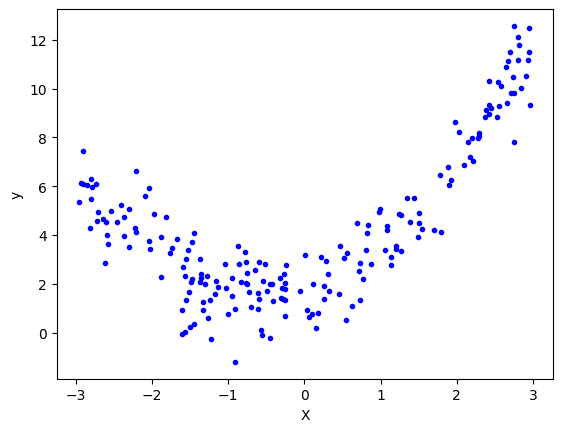

In [13]:

import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression,SGDRegressor

from sklearn.preprocessing import PolynomialFeatures,StandardScaler

from sklearn.metrics import r2_score

from sklearn.pipeline import Pipeline
X = 6 * np.random.rand(200, 1) - 3
y = 0.8 * X**2 + 0.9 * X + 2 + np.random.randn(200, 1)

# y = 0.8x^2 + 0.9x + 2
plt.plot(X, y,'b.')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

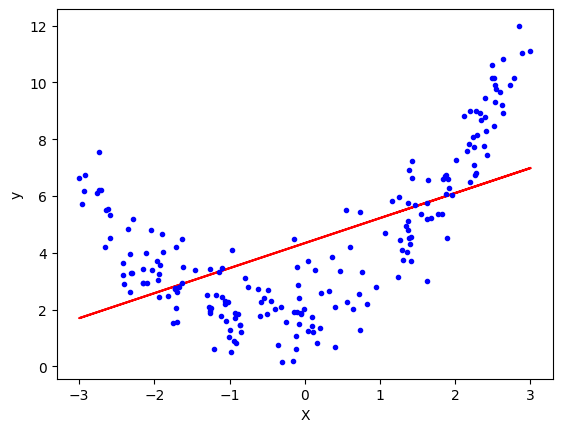

In [14]:
X = 6 * np.random.rand(200, 1) - 3
y = 0.8 * X**2 + 0.9 * X + 2 + np.random.randn(200, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Applying linear regression
lr = LinearRegression()
lr.fit(X_train,y_train)
LinearRegression()
y_pred = lr.predict(X_test)
r2_score(y_test,y_pred)
plt.plot(X_train,lr.predict(X_train),color='r')
plt.plot(X, y, "b.")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

[1.23426026]
[1.         1.23426026 1.5233984 ]
[[0.         0.87772635 0.78531254]]
[2.00988029]


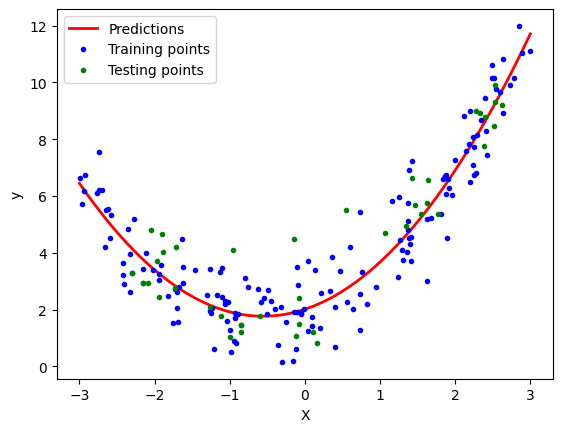

In [15]:
#Applying Polynomial Linear Regression
# degree 2
poly = PolynomialFeatures(degree=2,include_bias=True)

X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)
print(X_train[0])
print(X_train_trans[0])
# include_bias parameter
lr = LinearRegression()
lr.fit(X_train_trans,y_train)
LinearRegression()
y_pred = lr.predict(X_test_trans)
r2_score(y_test,y_pred)

print(lr.coef_)
print(lr.intercept_)
X_new=np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

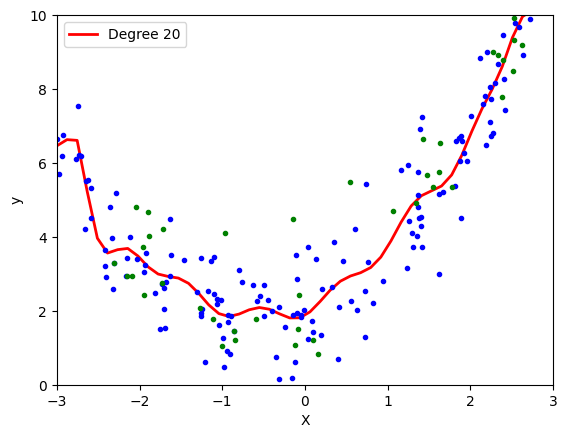

In [16]:
def polynomial_regression(degree):
    X_new=np.linspace(-3, 3, 50).reshape(50, 1)
    X_new_poly = poly.transform(X_new)

    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig,'r', label="Degree " + str(degree), linewidth=2)

    plt.plot(X_train, y_train, "b.", linewidth=3)
    plt.plot(X_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-3, 3, 0, 10])
    plt.show()
polynomial_regression(20)

C:\Users\anshu\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



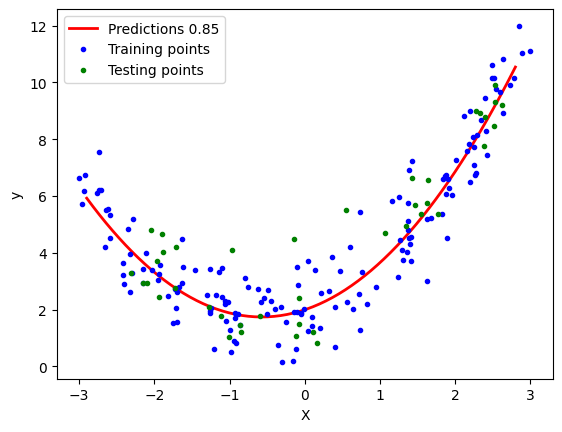

In [17]:
# Applying Gradient Descent

poly = PolynomialFeatures(degree=2)

X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

sgd = SGDRegressor(max_iter=100)
sgd.fit(X_train_trans,y_train)

X_new=np.linspace(-2.9, 2.8, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = sgd.predict(X_new_poly)

y_pred = sgd.predict(X_test_trans)

plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions " + str(round(r2_score(y_test,y_pred),2)))
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [18]:
# 3D polynomial regression
x = 7 * np.random.rand(100, 1) - 2.8
y = 7 * np.random.rand(100, 1) - 2.8
# X_multi = np.array([x,y]).reshape(100,2)
X_multi = np.c_[x, y]
print(type(x),type(X_multi))
z = x**2 + y**2 + 0.2*x + 0.2*y + 0.1*x*y +2 + np.random.randn(100, 1)
# z = x^2 + y^2 + 0.2x + 0.2y + 0.1xy + 2
import plotly.express as px
fig = px.scatter_3d( x=x.ravel(), y=y.ravel(), z=z.ravel())
fig.show()
lr1 = LinearRegression()
lr1.fit(X_multi,z)
z_pre=lr1.predict(X_multi)
print(r2_score(z,z_pre))

x_input = np.linspace(x.min(), x.max(), 10)
y_input = np.linspace(y.min(), y.max(), 10)
x_grid,y_grid=np.meshgrid(x_input,y_input)
final=np.c_[x_grid.ravel(),y_grid.ravel()]
z_final = lr1.predict(final).reshape(10,10)
import plotly.graph_objects as go

fig = px.scatter_3d( x=x.ravel(), y=y.ravel(), z=z.ravel())

fig.add_trace(go.Surface(x = x_input, y = y_input, z =z_final ))
fig.show()

X_multi.shape

poly = PolynomialFeatures(degree=4)
X_multi_trans = poly.fit_transform(X_multi)
# print("Input",poly.n_input_features)
# print("Ouput",poly.n_output_features_)
print("Powers\n",poly.powers_)

print(X_multi_trans.shape)
lr = LinearRegression()
lr.fit(X_multi_trans,z)
X_test_multi = poly.transform(final)
z_final = lr.predict(X_test_multi).reshape(x_grid.shape)
z_pred=lr.predict(X_multi_trans)
print(r2_score(z,z_pred))
fig = px.scatter_3d(x=x.ravel(), y=y.ravel(), z=z.ravel())

fig.add_trace(go.Surface(x = x_input, y = y_input, z =z_final))

fig.update_layout(scene = dict(zaxis = dict(range=[0,35])))
fig.show()
 

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


0.5408119215599216


Powers
 [[0 0]
 [1 0]
 [0 1]
 [2 0]
 [1 1]
 [0 2]
 [3 0]
 [2 1]
 [1 2]
 [0 3]
 [4 0]
 [3 1]
 [2 2]
 [1 3]
 [0 4]]
(100, 15)
0.9872035044183847


In [19]:
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures

# Generate data
np.random.seed(0)
x = 7 * np.random.rand(100, 1) - 2.8
y = 7 * np.random.rand(100, 1) - 2.8
z = x**2 + y**2 + 0.2*x + 0.2*y + 0.1*x*y + 2 + np.random.randn(100, 1)

# Visualize original data
fig1=go.Figure()
#fig1.add_trace(go.Scatter3d(x=x.ravel(), y=y.ravel(), z=z.ravel(), mode='markers', marker=dict(size=3)))
fig1.add_trace(go.Scatter3d(x=x.ravel(), y=y.ravel(), z=z.ravel(), mode='markers', marker=dict(size=3)))
fig1.show()

# Perform polynomial regression
X_multi = np.hstack((x, y))
poly = PolynomialFeatures(degree=4)
X_multi_trans = poly.fit_transform(X_multi)

lr = LinearRegression()
lr.fit(X_multi_trans, z)
x_input = np.linspace(x.min(), x.max(), 10)
y_input = np.linspace(y.min(), y.max(), 10)
x_grid,y_grid=np.meshgrid(x_input,y_input)
final=np.c_[x_grid.ravel(),y_grid.ravel()]
X_test_multi=poly.transform(final)

#X_test_multi = poly.transform(np.array(np.meshgrid(x_input, y_input)).T.reshape(-1, 2))
z_final = lr.predict(X_test_multi).reshape(x_grid.shape)

# Visualize the regression surface
fig = go.Figure()

fig.add_trace(go.Scatter3d(x=x.ravel(), y=y.ravel(), z=z.ravel(), mode='markers', marker=dict(size=3)))
fig.add_trace(go.Surface(x=x_input, y=y_input, z=z_final, opacity=0.7))

fig.update_layout(scene=dict(zaxis=dict(range=[0, 35])))
fig.show()

# Calculate R-squared score
z_pred = lr.predict(X_multi_trans)
r2 = r2_score(z, z_pred)
print("R-squared score:", r2)


R-squared score: 0.9780265409131342
